# Atmospheres

The `rainbowconnection` allows us to create different atmospheres, through which light can be propagated. 



In [1]:
import rainbowconnection as rc
import astropy.units as u
import matplotlib.pyplot as plt, numpy as np

## Basics of `Atmosphere` Objects

Let's create an `Atmosphere` object representing a cartoon of Earth's atmosphere. 

In [2]:
e = rc.Earth()
e

EarthAtmosphere (0.0 deg from zenith, 0.0 scale heights from reference)

The `.plot()` method makes a simple plot of the transmission through the atmosphere.

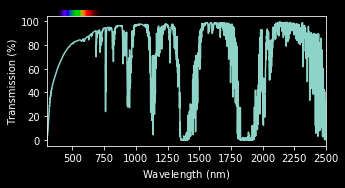

In [3]:
e.plot();

The `.transmission()` method returns the transmission, either at the default wavelengths or on a custom grid of wavelengths. The binning is done as averaging in transmission space (not optical depth), so should be reasonably accurate for flat spectral sources.

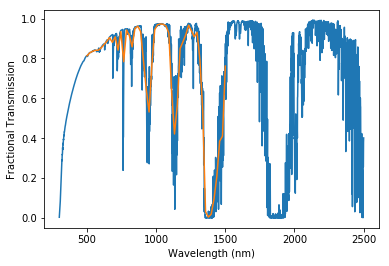

In [4]:
# use the default grid
plt.plot(e.wavelength(), e.transmission())

# choose our own wavelengths
w = np.linspace(500, 1500)*u.nm
plt.plot(w, e.transmission(w))

# labels
plt.xlabel('Wavelength (nm)'); plt.ylabel('Fractional Transmission');

## Zenith Angles

The atmosphere is assumed to be in hydrostatic balance and well-mixed in its composition. With these assumptions, we can approximate transmission through the atmosphere using the astronomer's notion of "airmass" that depends only on the angle we are pointing away from zenith. If we're looking straight up (zenith angle $z = 0^\circ$), we're looking through the minimum column density possible, which we call an airmass of 1. If we're looking along a path $30^\circ$ above the horizon (zenith angle $z = 60^\circ$), then the airmass of $\sec z = 2$ means we're looking through twice the column density.

We can point at different zenith angles in our atmosphere with the `.set_zenith_angle()` method. The `.transmission()` method will remember the last zenith angle to be set, and calculate the transmission along that particular path. 

In [5]:
e.set_zenith_angle(60*u.deg)
e

EarthAtmosphere (60.0 deg from zenith, 0.0 scale heights from reference)

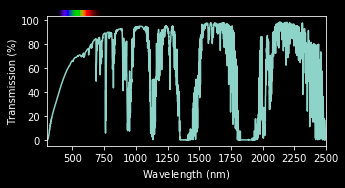

In [6]:
e.plot();

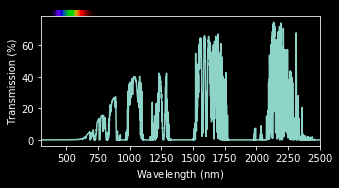

In [7]:
e.set_zenith_angle(90*u.deg)
e.plot();

A pretty sunset results from seeing the Sun along different zenith angles through the atmosphere.

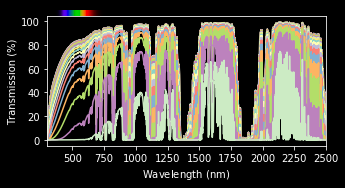

In [8]:
ax = None
for z in np.arange(0, 91, 5)*u.deg:
    e.set_zenith_angle(z)
    ax = e.plot(ax)

You can also set the initial zenith angle when you create the atmosphere with the `zenith_angle=` keyword argument:

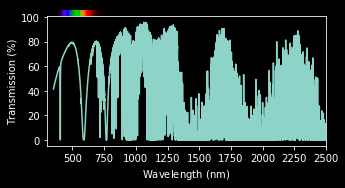

In [9]:
h = rc.HotJupiter(zenith_angle=45*u.deg)
h.plot()
plt.xlim(300, 2500);

## Altitudes

When creating an atmosphere, you can specify the altitue of your viewing location. In an exponentially stratified atmosphere, a higher altitude will result in greater transmission. The `altitude=` keyword argument when initializing the atmosphere. 

In [10]:
e = rc.Earth(altitude=1.1)
e

EarthAtmosphere (0.0 deg from zenith, 1.1 scale heights from reference)

Altitudes are expressed in units of atmospheric scale heights. Earth's surface scale height is about 8 km, so in the above example 1.1 refers to a viewer floating or standing on a mountain 8.8km above sea level. For each scale height we move up in the atmosphere, optical depths will drop off by a factor of 1/e.

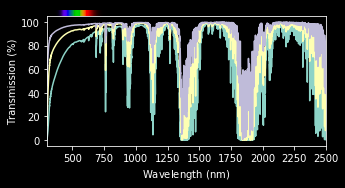

In [11]:
ax = None
for a in [0, 1, 2]:
    e = rc.Earth(altitude=a)
    ax = e.plot(ax)

On Earth or other planets with solid surfaces, it probably doesn't make sense to talk about negative altitudes. However, on a gas giant, a negative altitude simply refers to an altitude somewhere below the (often arbitrarily-defined) reference altitude.


In [12]:
j = rc.HotJupiter(altitude=-1.5, zenith_angle=45*u.deg)
j

HotJupiterAtmosphere (45.0 deg from zenith, -1.5 scale heights from reference)

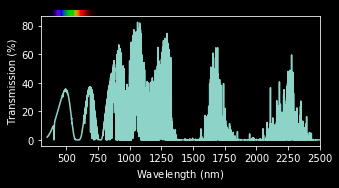

In [13]:
j.plot()
plt.xlim(300, 2500);

## Geometry

The "airmass" approximation assumes a plane-parallel atmosphere. For high airmasses, near the horizon, the plane-parallel approximation definely breaks down and the sphericity of the Earth comes into play. We capture this in an tremendously kludgy way by not allowing the calculated airmass to exceed the slant optical depth factor calculated in [Fortney (2005)](https://ui.adsabs.harvard.edu/abs/2005MNRAS.364..649F/abstract). This factor depends on the ratio of the atmospheric scale height to the radius of the planet:

In [14]:
e.fortney_factor()

<Quantity 71.09247481448233>

This value means that when the Sun is right on the horizon, it has to travel through 71 times more atmosphere than when it is straight overhead. In a true plane-parallel atmosphere, the horizon would correspond to an infinite airmass.